# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

### Importing Necessary Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

### Inspecting the Dataframe

In [4]:
# Let's check the dimensions of the dataframe
df.shape

(50000, 14)

In [5]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [6]:
# let's look at the statistical aspects of the dataframe
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### Data Visualization

In [7]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [9]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

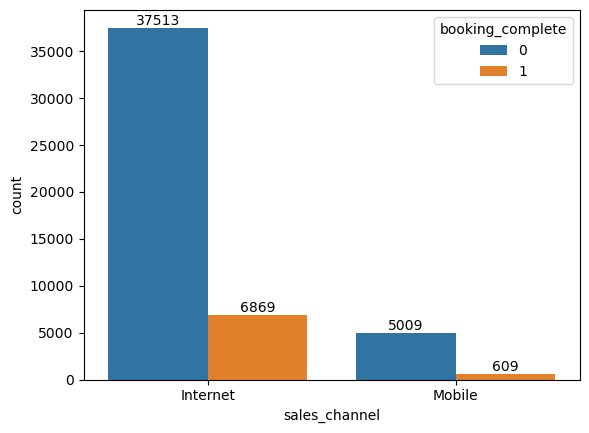

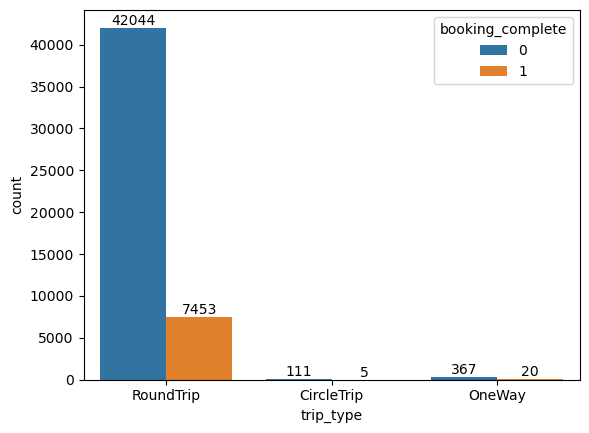

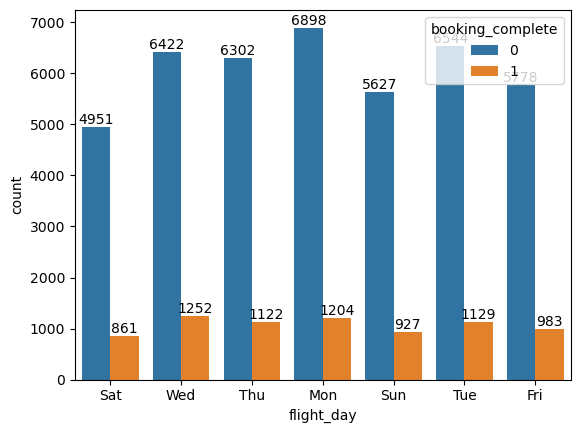

In [10]:
# Shows the Distribution of booking_complete with respect to other variables

categorical = ['sales_channel', 'trip_type', 'flight_day']

for i in categorical:
    a = sns.countplot(x=df[i],data=df, hue = df['booking_complete'])
    a.bar_label(a.containers[0])
    a.bar_label(a.containers[1])
    plt.show()

In [11]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


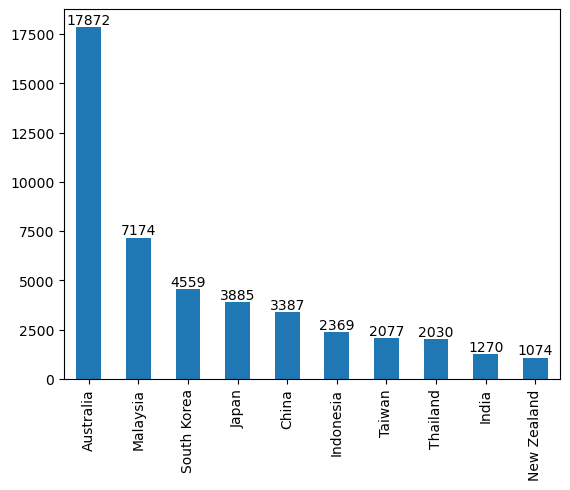

In [12]:
# booking origin 
a = df['booking_origin'].value_counts().iloc[:10].plot(kind = 'bar')
a.bar_label(a.containers[0])
plt.show()

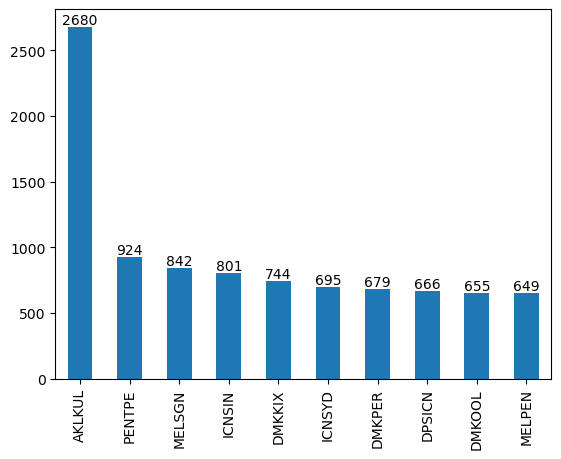

In [13]:
# route
a = df['route'].value_counts().iloc[:10].plot(kind = 'bar')
a.bar_label(a.containers[0])
plt.show()

In [14]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


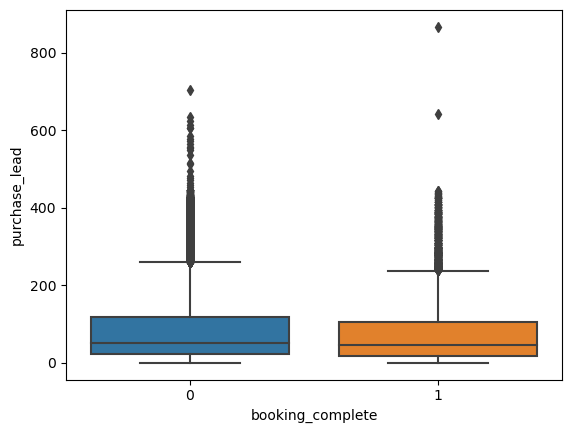

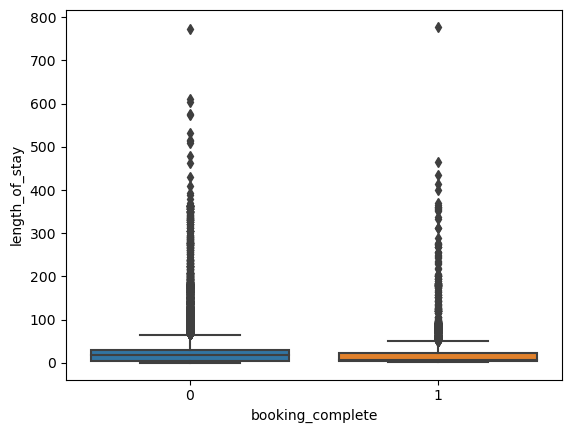

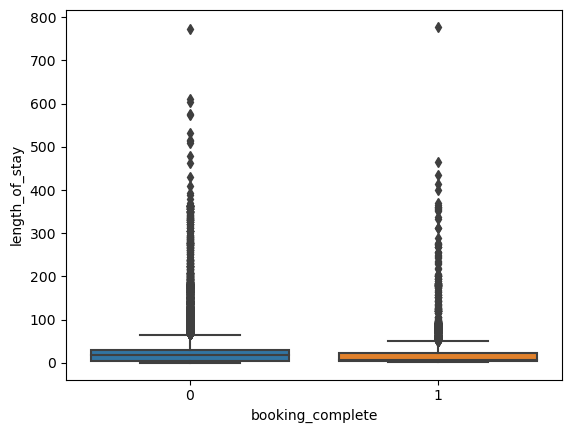

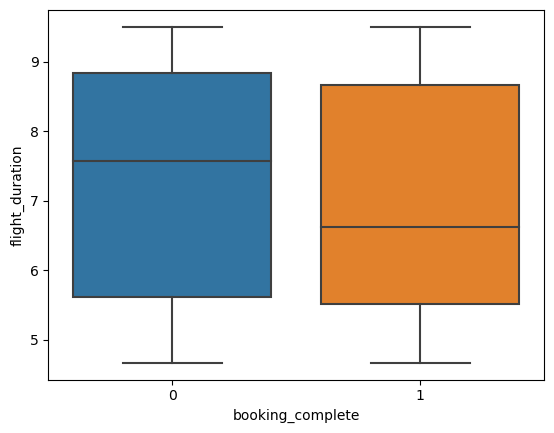

In [15]:
continuous = ['purchase_lead', 'length_of_stay', 'length_of_stay', 'flight_duration']

for i in continuous:
    sns.boxplot(x = df['booking_complete'], y = df[i])
    plt.show()

# Co-relation plot

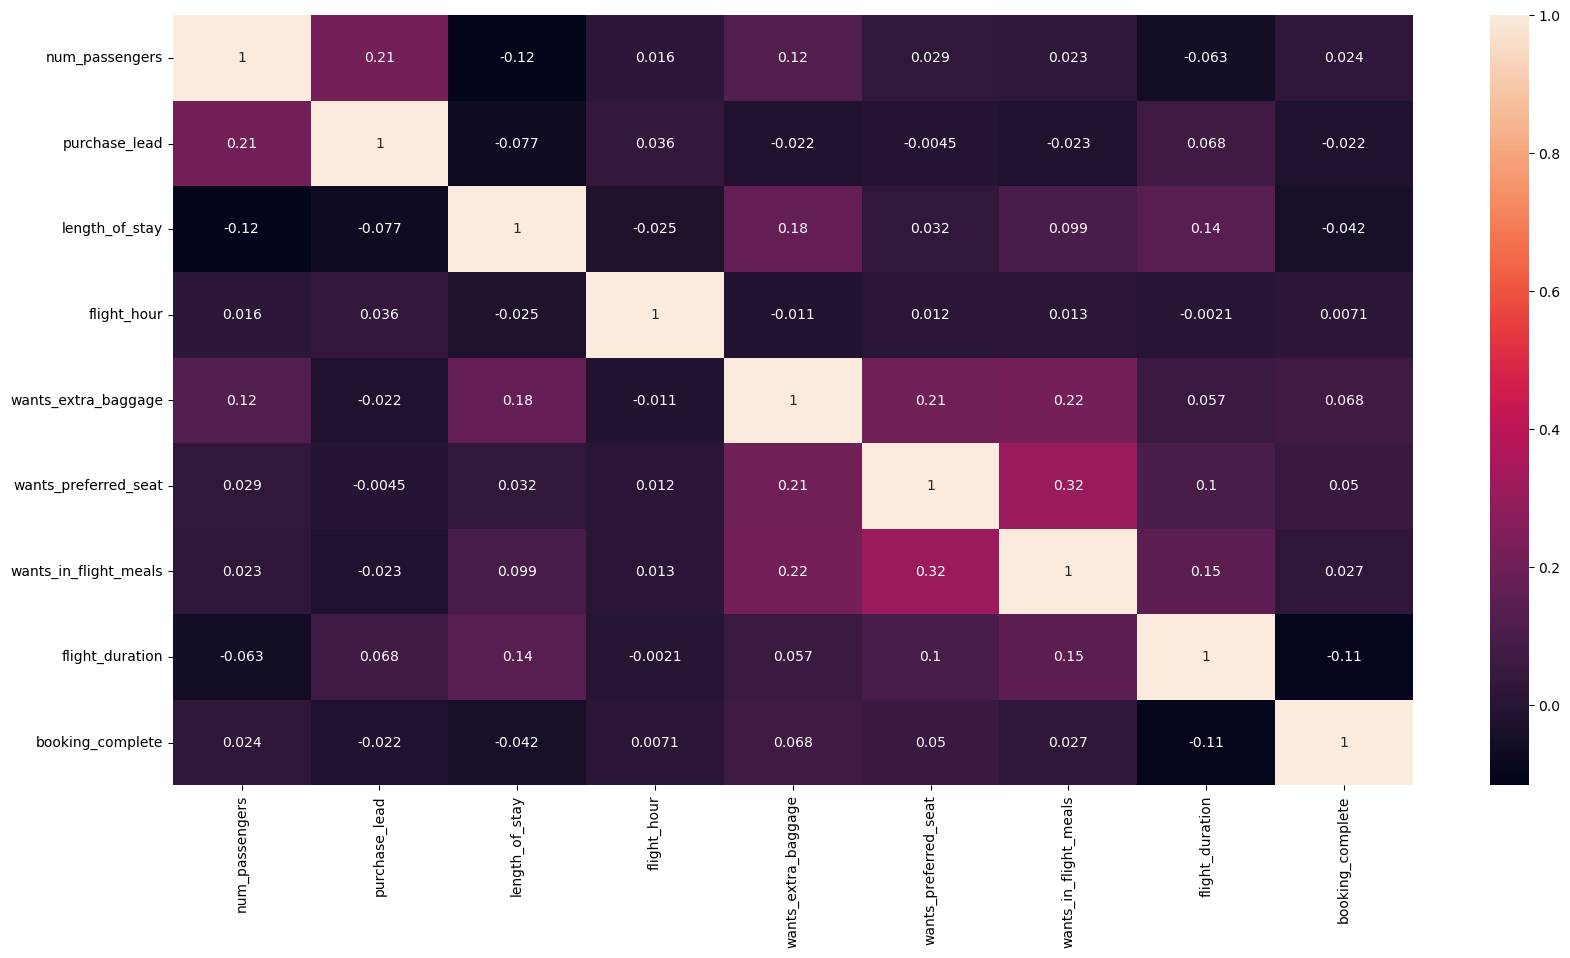

In [16]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

# Handling Null Values

In [18]:
# Checking for NULLs in the data
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

## Label Encoding, Onehot Encoding and Mapping

In [19]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


#### flight_day

In [26]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [27]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [28]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

### Label encoding - route, booking_origin

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
df[['route', 'booking_origin']] = df[['route', 'booking_origin']].apply(LabelEncoder().fit_transform)


In [31]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,0,61,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,0,61,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,0,36,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,0,61,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,0,36,1,0,1,5.52,0


### One hot encoding - sales_channel,trip_type

In [34]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['sales_channel', 'trip_type']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [35]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,Internet,RoundTrip,262,19,7,6,0,61,1,0,0,5.52,0,0,0,1
1,1,Internet,RoundTrip,112,20,3,6,0,61,0,0,0,5.52,0,0,0,1
2,2,Internet,RoundTrip,243,22,17,3,0,36,1,1,0,5.52,0,0,0,1
3,1,Internet,RoundTrip,96,31,4,6,0,61,0,0,1,5.52,0,0,0,1
4,2,Internet,RoundTrip,68,22,15,3,0,36,1,0,1,5.52,0,0,0,1


#### Dropping the repeated variables 

In [36]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['sales_channel', 'trip_type'], 1)

In [37]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,0,61,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,0,61,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,0,36,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,0,61,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,0,36,1,0,1,5.52,0,0,0,1


## Test-Train Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Putting feature variable to X
X = df.drop(['booking_complete'], axis=1)

X.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,0,61,1,0,0,5.52,0,0,1
1,1,112,20,3,6,0,61,0,0,0,5.52,0,0,1
2,2,243,22,17,3,0,36,1,1,0,5.52,0,0,1
3,1,96,31,4,6,0,61,0,0,1,5.52,0,0,1
4,2,68,22,15,3,0,36,1,0,1,5.52,0,0,1


In [40]:
# Putting response variable to y
y = df['booking_complete']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

In [41]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
# To check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35000, 14), (15000, 14), (35000,), (15000,))

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,0,61,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,0,61,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,0,36,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,0,61,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,0,36,1,0,1,5.52,0,0,0,1


In [47]:
scaler = MinMaxScaler()

X_train[['num_passengers','purchase_lead','length_of_stay','flight_hour','flight_day','booking_origin','flight_duration']] = scaler.fit_transform(X_train[['num_passengers','purchase_lead','length_of_stay','flight_hour','flight_day','booking_origin','flight_duration']])

X_train.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
48824,0.125,0.046136,0.007762,0.217391,0.000000,625,0.165049,1,0,1,0.861284,0,1,0
2704,0.625,0.382930,0.021992,0.217391,1.000000,53,0.495146,1,0,1,0.068323,0,0,1
25631,0.000,0.005767,0.002587,0.391304,0.000000,6,0.165049,0,0,0,0.861284,0,0,1
7285,0.000,0.053057,0.027167,0.608696,0.333333,180,0.776699,1,1,1,0.095238,0,0,1
27346,0.000,0.033449,0.003881,0.521739,0.166667,299,0.417476,0,0,0,0.600414,1,0,1


In [48]:
#scaler = MinMaxScaler()

X_test[['num_passengers','purchase_lead','length_of_stay','flight_hour','flight_day','booking_origin','flight_duration']] = scaler.fit_transform(X_test[['num_passengers','purchase_lead','length_of_stay','flight_hour','flight_day','booking_origin','flight_duration']])

X_test.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
4253,0.250,0.054602,0.033419,0.086957,1.000000,112,0.359223,1,1,1,0.343685,0,0,1
30076,0.125,0.028081,0.005141,0.217391,1.000000,115,0.883495,0,0,0,0.000000,0,0,1
48047,0.250,0.561622,0.007712,0.521739,1.000000,515,0.495146,1,1,0,0.861284,0,0,1
1666,0.000,0.073323,0.050129,0.391304,0.666667,6,0.592233,1,0,1,0.861284,0,0,1
30740,0.000,0.034321,0.005141,0.043478,0.166667,287,0.902913,1,0,0,0.482402,0,0,1


## Model Building 

## Logistic Regression 

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [51]:
# Training data is used for model building
lr.fit(X_train, y_train)

LogisticRegression()

In [52]:
# Testing data is used for prediction
y_pred_logreg = lr.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test, y_pred_logreg)

0.8524666666666667

In [55]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix

In [56]:
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
logistic_confusion_matrix

array([[12787,     0],
       [ 2213,     0]], dtype=int64)

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

In [58]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[12787     0]
 [ 2213     0]]
Accuracy: [0.85246667]
Sensitivity : [0.85246667]
Specificity : [nan]
Precision: [1.]
Recall: [0.85246667]
F-score: [0.92035844]
AUC: 0.5
ROC curve:


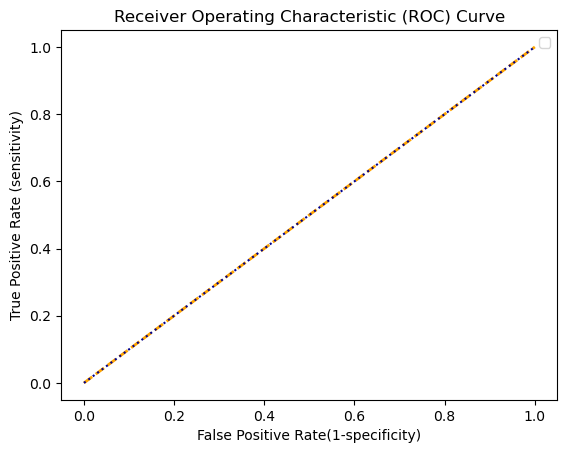

In [59]:
get_summary(y_test, y_pred_logreg)

## Support Vector Machine (SVM)

In [60]:
from sklearn.svm import SVC

In [61]:
svc = SVC()

In [62]:
svc.fit(X_train, y_train)

SVC()

In [63]:
y_pred_svc = svc.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred_svc)

0.8524666666666667

In [65]:
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

array([[12787,     0],
       [ 2213,     0]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[12787     0]
 [ 2213     0]]
Accuracy: [0.85246667]
Sensitivity : [0.85246667]
Specificity : [nan]
Precision: [1.]
Recall: [0.85246667]
F-score: [0.92035844]
AUC: 0.5
ROC curve:


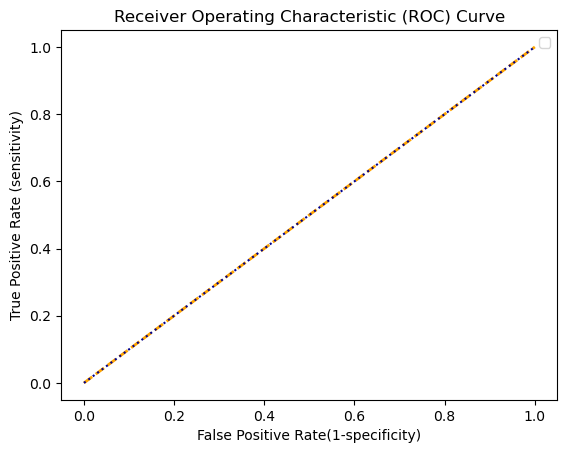

In [66]:
get_summary(y_test, y_pred_svc)

## Naive bayes Classification

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
gnb = GaussianNB()

In [71]:
gnb.fit(X_train, y_train)

GaussianNB()

In [72]:
y_pred_gnb = gnb.predict(X_test)

In [73]:
accuracy_score(y_test,y_pred_gnb)

0.7430666666666667

In [74]:
gnb_confusion_matrix = confusion_matrix(y_test, y_pred_gnb)
gnb_confusion_matrix

array([[10245,  2542],
       [ 1312,   901]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[10245  2542]
 [ 1312   901]]
Accuracy: [0.74306667]
Sensitivity : [0.88647573]
Specificity : [0.26169039]
Precision: [0.80120435]
Recall: [0.88647573]
F-score: [0.84168584]
AUC: 0.6041719888141873
ROC curve:


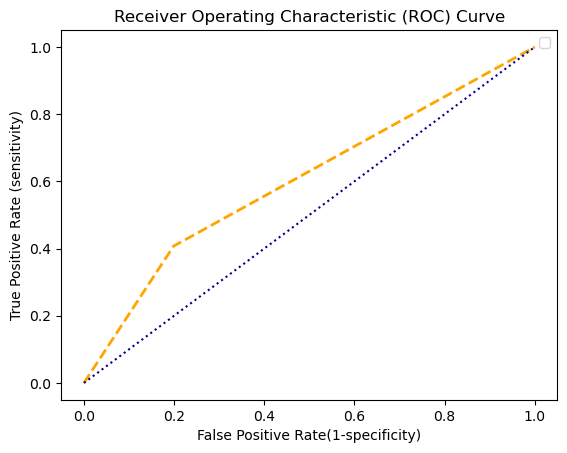

In [75]:
get_summary(y_test, y_pred_gnb)

## K - Nearest Neighbour

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier()

In [78]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
y_pred_knn = knn.predict(X_test)

In [80]:
accuracy_score(y_test, y_pred_knn)

0.8323333333333334

In [81]:
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

array([[12096,   691],
       [ 1824,   389]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[12096   691]
 [ 1824   389]]
Accuracy: [0.83233333]
Sensitivity : [0.86896552]
Specificity : [0.36018519]
Precision: [0.94596074]
Recall: [0.86896552]
F-score: [0.90582993]
AUC: 0.5608701131200701
ROC curve:


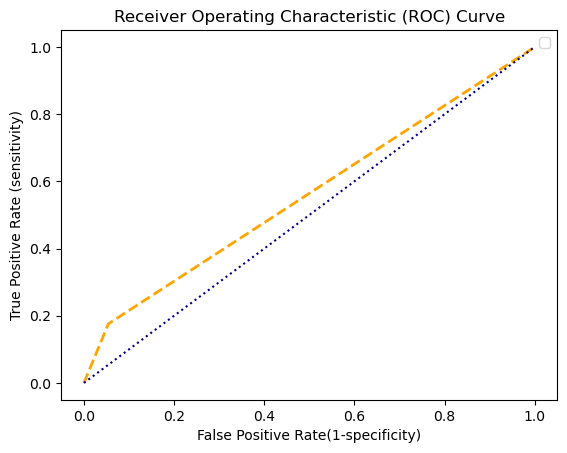

In [82]:
get_summary(y_test, y_pred_knn)

## Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dtree = DecisionTreeClassifier()

In [85]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
y_pred_dtree = dtree.predict(X_test)

In [87]:
accuracy_score(y_test, y_pred_dtree)

0.7746666666666666

In [88]:
dtree_confusion_matrix = confusion_matrix(y_test, y_pred_dtree)
dtree_confusion_matrix

array([[10927,  1860],
       [ 1520,   693]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[10927  1860]
 [ 1520   693]]
Accuracy: [0.77466667]
Sensitivity : [0.87788222]
Specificity : [0.27144536]
Precision: [0.85453977]
Recall: [0.87788222]
F-score: [0.86605374]
AUC: 0.5838446688346456
ROC curve:


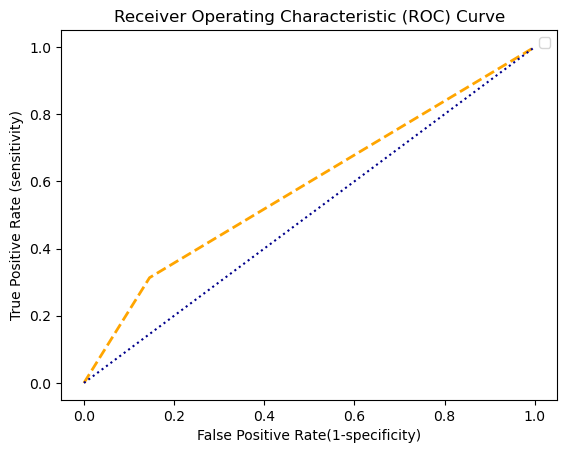

In [89]:
get_summary(y_test, y_pred_dtree)

## Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc = RandomForestClassifier()

In [92]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
y_pred_rfc = rfc.predict(X_test)

In [94]:
accuracy_score(y_test, y_pred_rfc)

0.8531333333333333

In [95]:
RandomForest_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
RandomForest_confusion_matrix

array([[12585,   202],
       [ 2001,   212]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[12585   202]
 [ 2001   212]]
Accuracy: [0.85313333]
Sensitivity : [0.86281366]
Specificity : [0.51207729]
Precision: [0.98420271]
Recall: [0.86281366]
F-score: [0.91951923]
AUC: 0.5400001328733136
ROC curve:


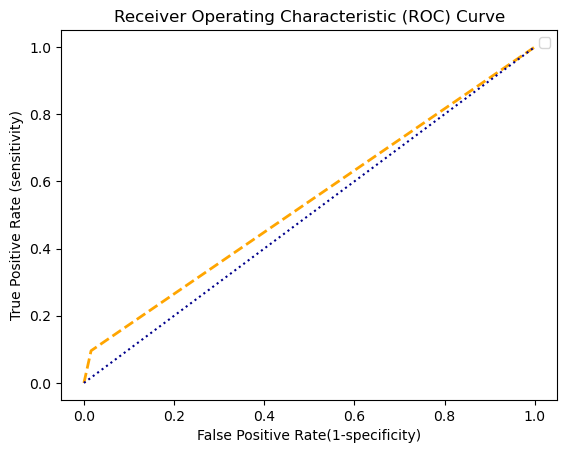

In [96]:
get_summary(y_test, y_pred_rfc)

## Accuracy scores summary

In [97]:
LR = accuracy_score(y_test, y_pred_logreg)
SVM = accuracy_score(y_test, y_pred_svc)
NB = accuracy_score(y_test,y_pred_gnb)
KNN = accuracy_score(y_test, y_pred_knn)
DT = accuracy_score(y_test, y_pred_dtree) 
RF = accuracy_score(y_test, y_pred_rfc)

### Create a bar chart to compare the accuracy of all classification models

In [98]:
algorithms = ['LR','SVM','NB','KNN','DT', 'RF']
accuracies = [LR,SVM,NB,KNN,DT,RF]

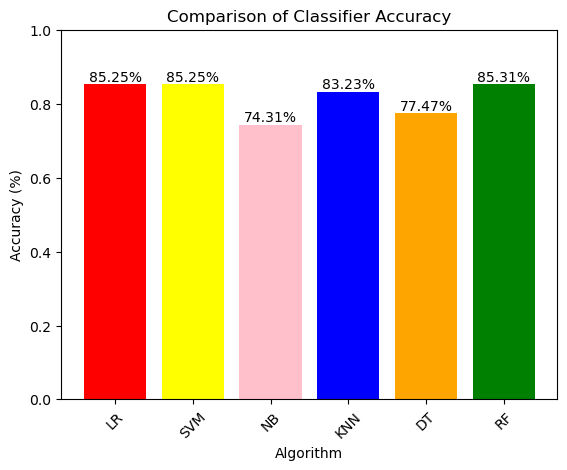

In [99]:
c = ['red', 'yellow', 'pink', 'blue', 'orange','green']
plt.bar(algorithms, accuracies,color=c)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Classifier Accuracy')
plt.ylim([0, 1])  # Set the y-axis limits between 0 and 1 or 0 and 100. 
plt.xticks(rotation=45)

for i in range(len(algorithms)):
    plt.text(i, accuracies[i],f"{accuracies[i]*100:.2f}%", ha='center',va= 'bottom')
plt.show()

##### This visualization provides a comparison of the accuracy of different classification models, allowing you to easily identify the model with the highest accuracy.